In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [154]:
gamma = 0.0138172
eta = 6.205e-6
phi = 6.205e-6
r_r = 200
l_r = 5000
l_p = 975


def dN_dt(X, t=0):
    #X[0] = [ribosomes](t)
    #X[1] = [proteins](t)
    return np.array([
            gamma*X[0]*r_r/l_r - eta*X[0],
            (1-gamma)*X[0]*r_r/l_p - phi*X[1]
    ])

timesteps = 1269.00000000000009

def cell_generation(initial_array=np.array([2*5773,2*2.11e6]).reshape(1,-1), timesteps=timesteps):
    initial_ribosomes = initial_array[-1,0]/2
    initial_proteins = initial_array[-1,1]/2
    t = np.arange(timesteps)
    
    return np.row_stack([initial_array,
                            odeint(dN_dt, [initial_ribosomes,initial_proteins], t)])

def sim_cell_dynamics(n_generations, t_per_generation=timesteps):
    cell = cell_generation(timesteps=t_per_generation)
    for i in range(n_generations-1):
        cell = cell_generation(cell)
        
    return cell

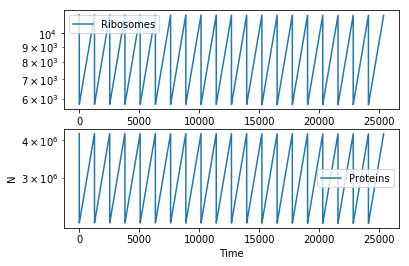

In [160]:
cell = sim_cell_dynamics(20)
ribo = cell[:,0]
prot = cell[:,1]

fig, axes = plt.subplots(2)

axes[0].plot(ribo, label='Ribosomes')
axes[1].plot(prot, label='Proteins')
#plt.xscale('log')
axes[0].set_yscale('log')
axes[1].set_yscale('log')
plt.xlabel('Time')
plt.ylabel('N')
#axes[0].set_xlim([2,5000])
#axes[1].set_xlim([2,5000])
axes[0].legend()
axes[1].legend()
plt.show()

In [159]:
cell

array([[  11546.        , 4220000.        ],
       [   5773.        , 2110000.        ],
       [   5776.15570868, 2111155.06580487],
       ...,
       [  11531.0037521 , 4217558.25180129],
       [  11537.30697401, 4219865.36481818],
       [  11543.61364146, 4222173.73896341]])